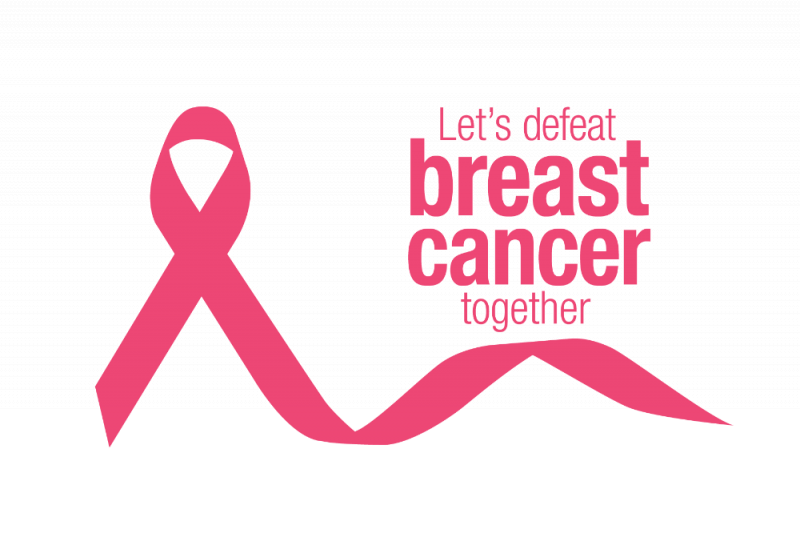

**Attribute Information:**
   * ID number
   * Diagnosis (M = malignant, B = benign)
   
**Ten real-valued features are computed for each cell nucleus:**
   * radius (mean of distances from center to points on the perimeter)
   * texture (standard deviation of gray-scale values)
   * perimeter
   * area
   * smoothness (local variation in radius lengths)
   * compactness (perimeter^2 / area - 1.0)
   * concavity (severity of concave portions of the contour)
   * concave points (number of concave portions of the contour)
   * symmetry
   * fractal dimension ("coastline approximation" - 1)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# read the dataset
df=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape 

(569, 33)

In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#description about the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# dropping unncessary columns
df.drop("Unnamed: 32",axis=1,inplace=True)


In [7]:
#checking missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

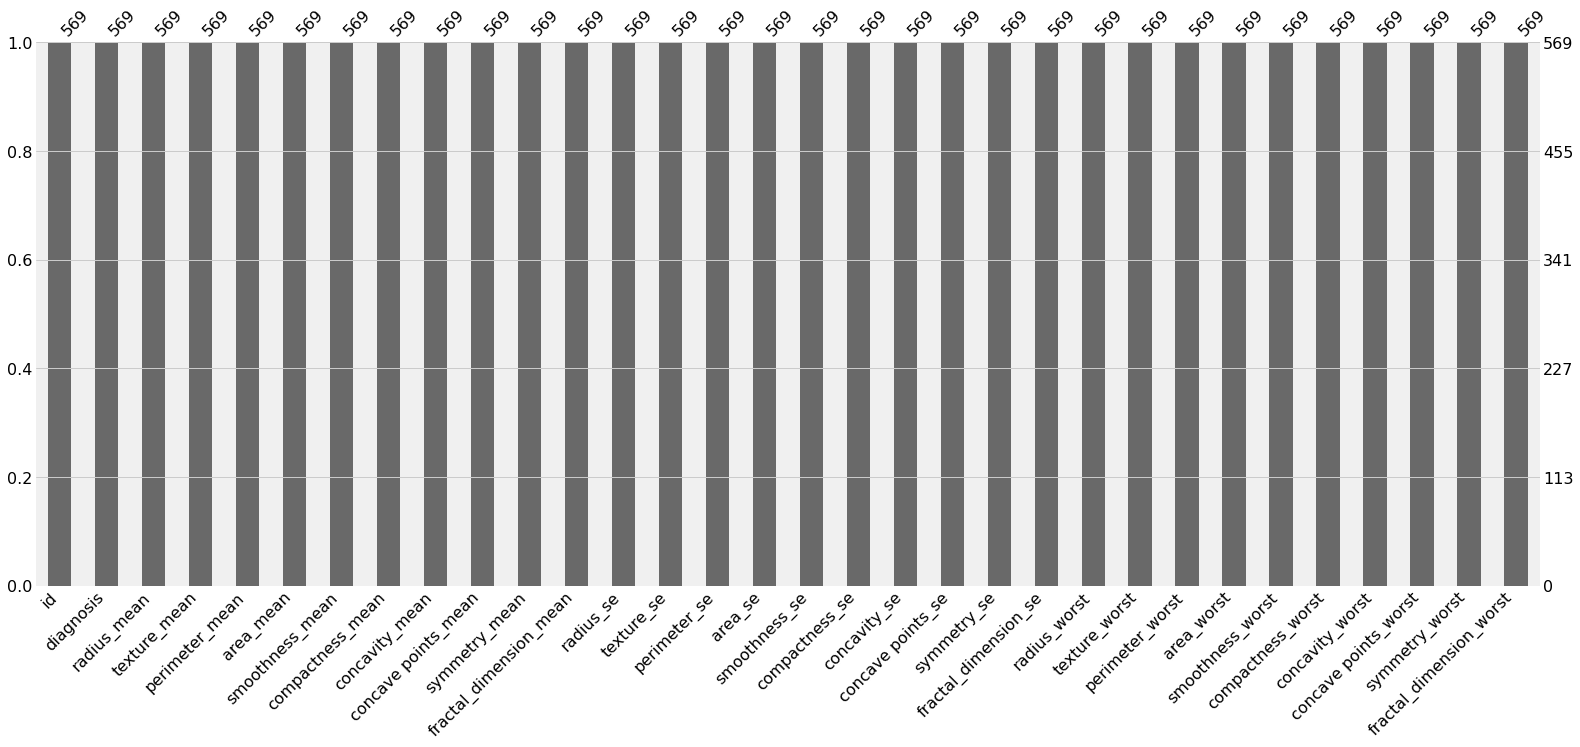

In [8]:
import missingno as msno
msno.bar(df)

# Exploratory Data analysis

## Univariate Analysis

In [9]:
fig= px.histogram(df, x='diagnosis',color='diagnosis', barmode='group')
fig.show()

In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
fig = px.pie(df, values='radius_mean', names='diagnosis', title='Relation')
fig.show()

## Multivariate Analysis

### Positive Correlation

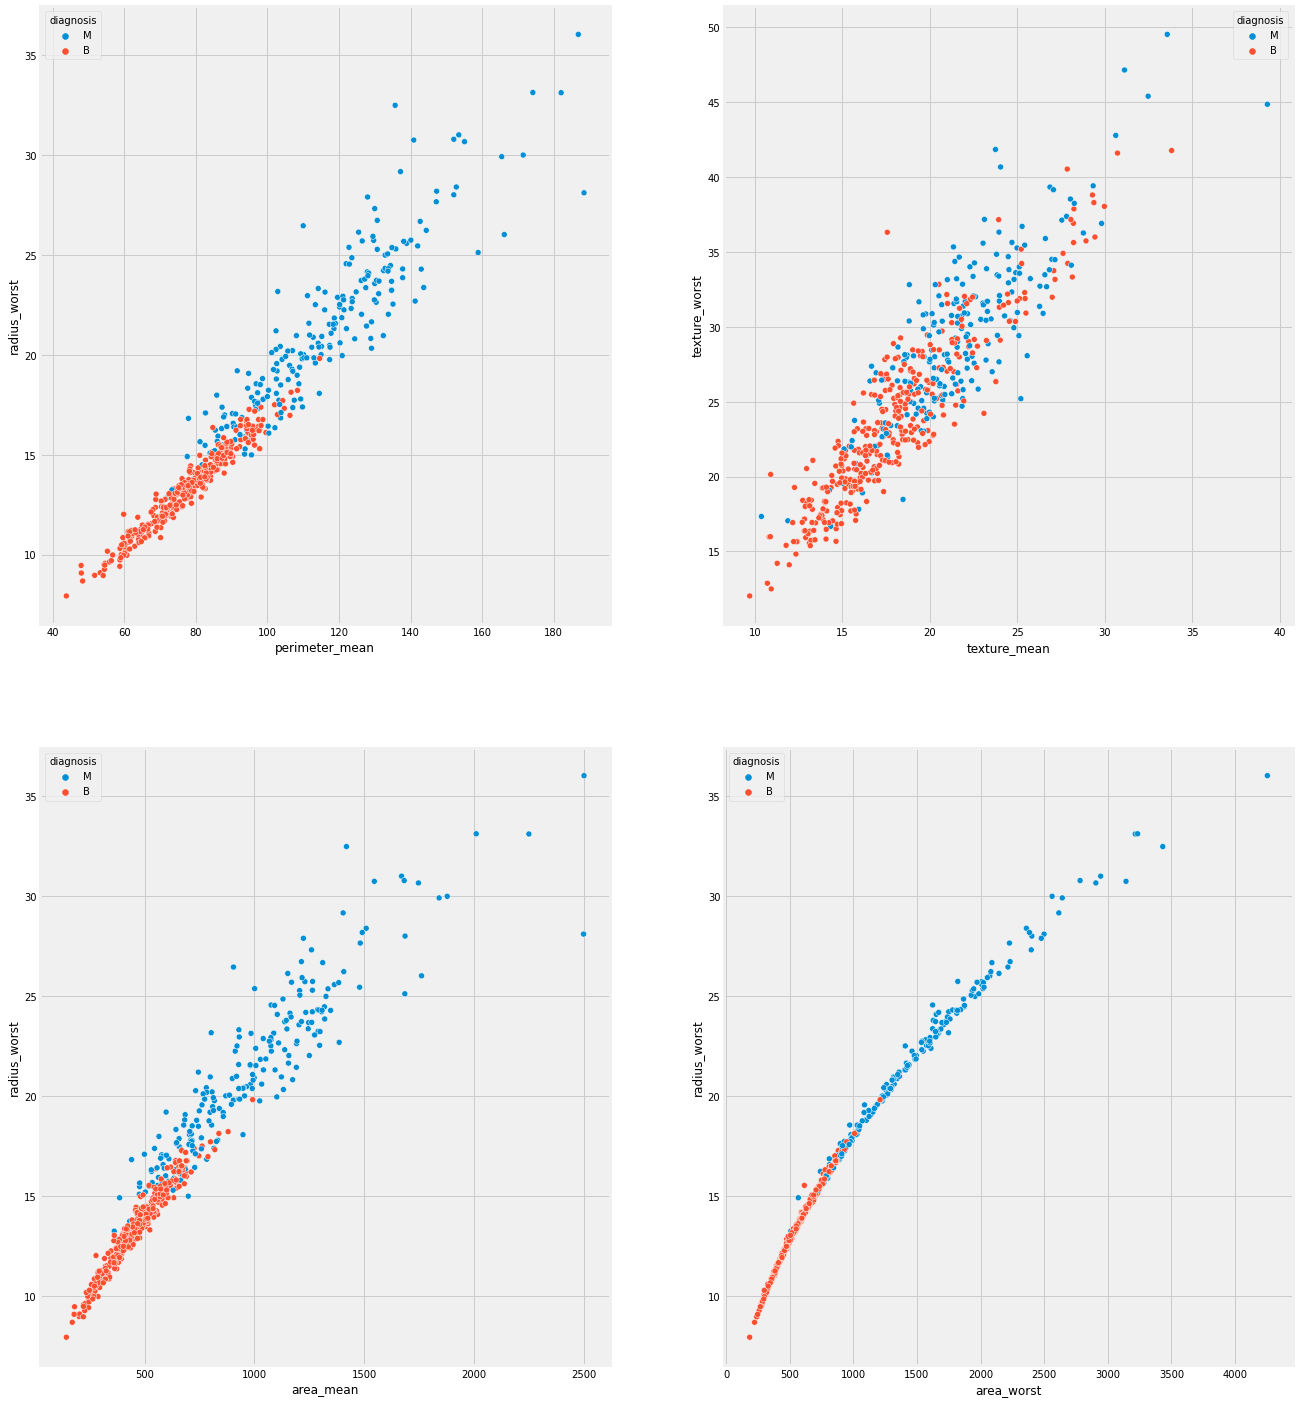

In [12]:
#postive correlation
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='perimeter_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='texture_mean',y='texture_worst',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_worst',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][1])
plt.show()

### 2.Negative Correlation

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_se'>

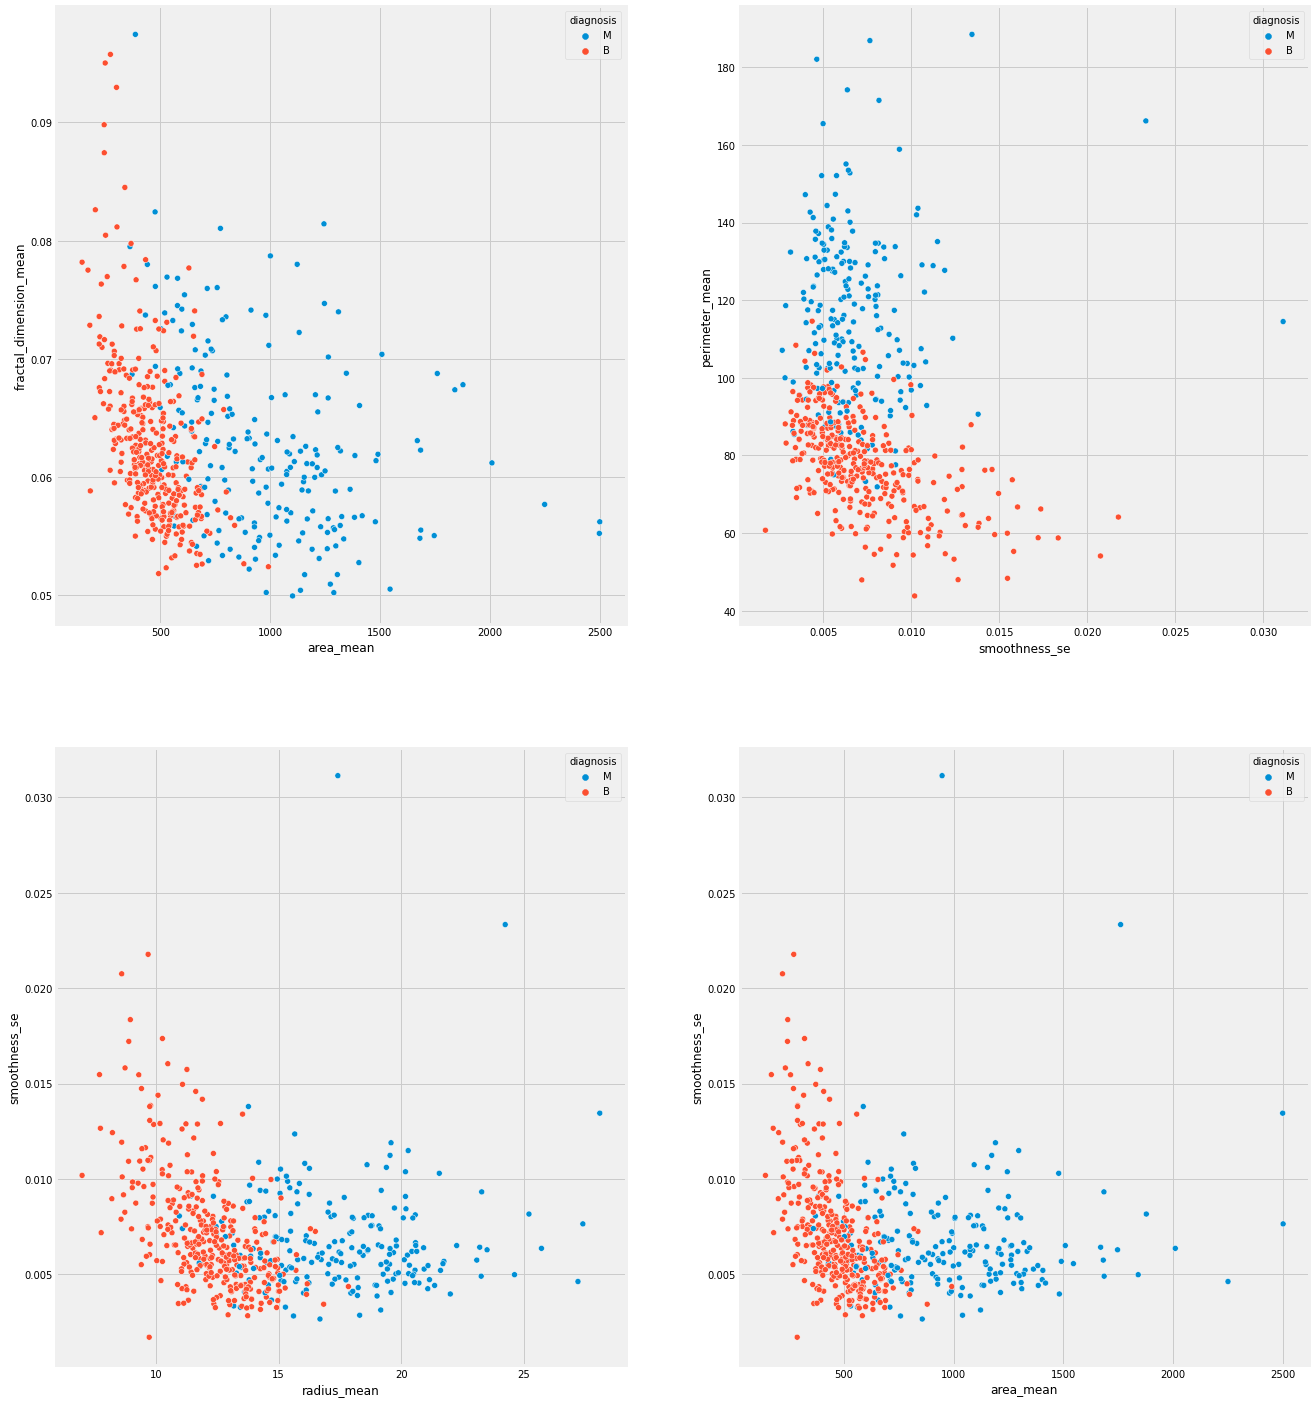

In [13]:
#negative correlation
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='area_mean',y='fractal_dimension_mean',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='radius_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='smoothness_se',y='perimeter_mean',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][1])

### Scatterplot using plotly

In [14]:
fig = px.scatter(df,x='radius_mean',y='perimeter_mean',color='diagnosis',size_max=60)
fig.show()


In [15]:
fig2=px.scatter(df,x='texture_worst',y= 'symmetry_worst',color='diagnosis',size_max=60)
fig2.show()

### Distribution plot

In [16]:
import plotly.figure_factory as ff


hist_data = [df['radius_mean']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

### Correlation metric

<AxesSubplot:>

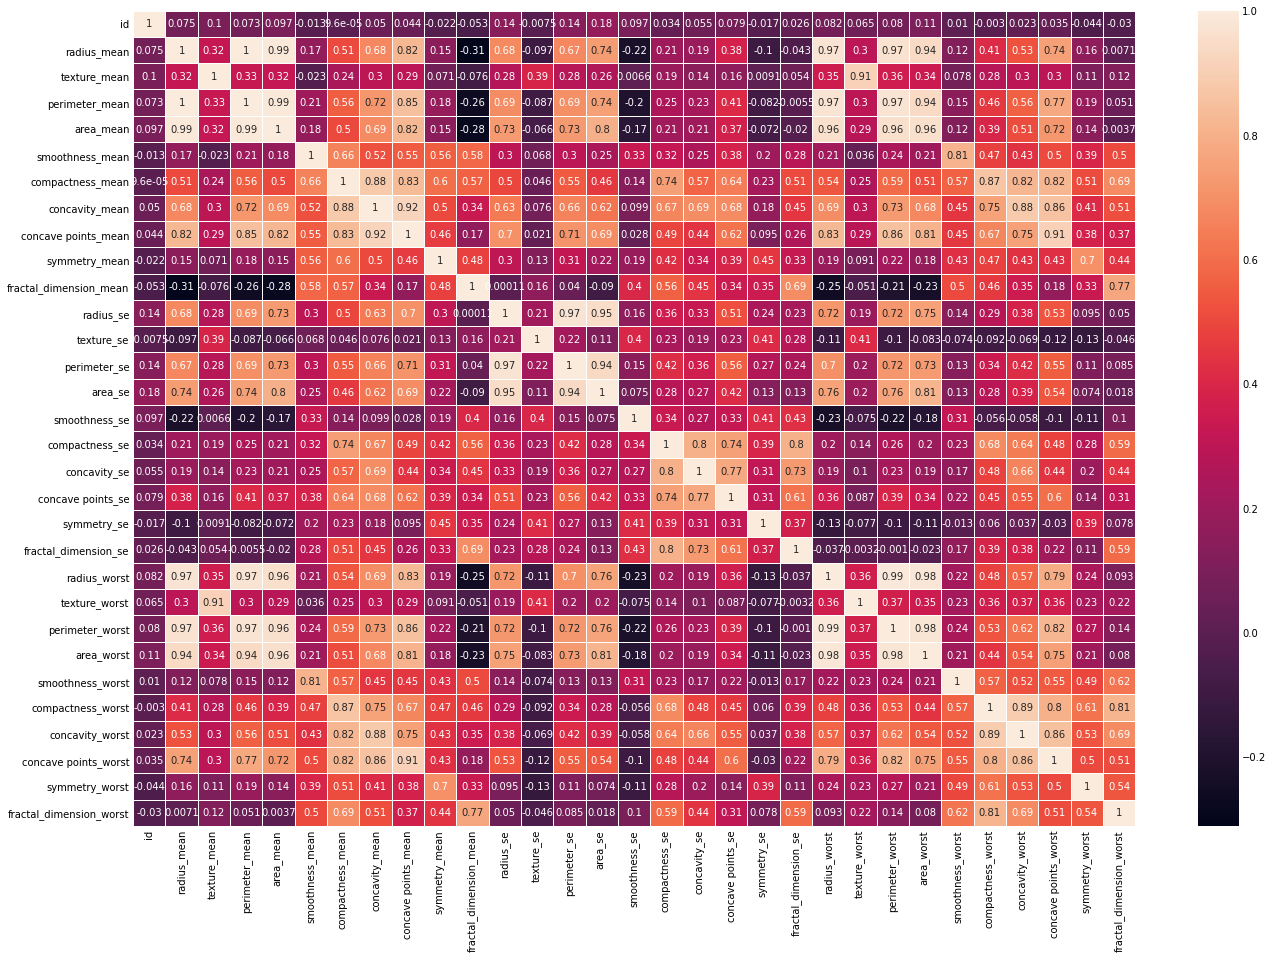

In [17]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=.5)

# Data Preprocessing

In [18]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [19]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
labelencode = LabelEncoder()
y=labelencode.fit_transform(y)

In [20]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [21]:
#applying standard scaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
X_train

array([[-0.75450089,  1.01659115, -0.73128733, ..., -0.27255521,
        -1.22412178,  0.24637476],
       [-0.10731754, -1.37755096, -0.16735748, ..., -0.87152919,
        -0.08199343, -0.89975242],
       [ 0.8720484 ,  0.59885153,  0.81306413, ...,  1.31190285,
         0.54930958, -0.44082843],
       ...,
       [-0.59986416,  0.74483581, -0.55511131, ..., -0.0754895 ,
        -1.09721863,  0.61126664],
       [ 1.80273241,  0.53372009,  1.73767584, ...,  0.97127625,
        -0.4257564 , -0.93464483],
       [-0.6886371 , -1.05863146, -0.6567353 , ..., -0.13148291,
        -0.43378824,  0.92470699]])

# Keras for classification

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
classifier = Sequential()

In [25]:
#adding the input and first hidden layer

classifier.add(Dense(16, activation='relu', kernel_initializer='glorot_uniform',input_dim=30))

#adding second layer
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform'))

#adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [26]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
classifier.fit(X_train,y_train,batch_size=100,epochs=150)

Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 0.6857 - accuracy: 0.6363
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.6356
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.6479
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6623
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.7081
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6551 - accuracy: 0.7716
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7936
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.8390
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.8808
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.8885
Epoch 11/150
4/4 [===========

In [28]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [29]:
from sklearn.metrics import accuracy_score


print(f"The test accuracy is very high i.e.{accuracy_score(y_test,y_pred)}")

The test accuracy is very high i.e.0.9883040935672515


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[103,   0],
       [  2,  66]])

<AxesSubplot:>

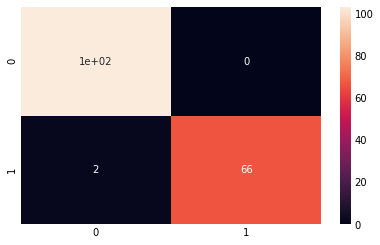

In [31]:
sns.heatmap(cm,annot=True)


## Using Keras, We get a good model accuracy i.e. greater than 98%.

### If you like the work ,Upvote it.
### Any suggestion is welcomed.